# Pendahuluan

Di dalam material ini, kamu akan mempelajari Data Heart Disease dan belajar bagaimana melakukan pemodelan. Lakukan kode dan jalankan setiap sel. Selama proses pembelajaran, kamu akan menemui beberapa blok **TODO** -- ikuti petunjuk untuk mengisinya sebelum menjalankan sel-sel tersebut dan melanjutkan.

In [ ]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Memuat dataset yang sudah rapi ditahapan sebelumnya
data = "data.csv"
df = pd.read_csv(data, index_col=0)
df['sex'] = df['sex'].replace({'Male' : 1,'Female': 0})
df['cp'] = df['cp'].replace({'typical angina' : 0, 'atypical angina' : 1, 'non-anginal pain' : 2, 'asymtomatic' : 3})
df['fbs'] = df['fbs'].replace({'No' : 0, 'Yes' : 1})
df['restecg'] = df['restecg'].replace({'probable or definite left ventricular hypertrophy':0,'normal':1,'ST-T Wave abnormal':2})
df['exang'] = df['exang'].replace({'No':0,'Yes':1})
df['slope'] = df['slope'].replace({'downsloping':0, 'flat':1,'upsloping':2})
df['thal'] = df['thal'].replace({'normal':1, 'fixed defect':2,'reversable defect':3})
df['ca'] = df['ca'].replace({'Number of major vessels: 0':0, 'Number of major vessels: 1':1,'Number of major vessels: 2':2, 'Number of major vessels: 3':3})
df['target'] = df['target'].replace({'No disease':0,'Disease':1})

'''TODO: Ambil variabel terpilih'''
# Variabel terpilih
variable = ['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', 'age', 'target']
df = df[variable]

In [ ]:
df.head()

,cp,thalach,slope,oldpeak,exang,ca,thal,sex,age,target
0,0,168,2,1.0,0,2,3,1,52,0
1,0,155,0,3.1,1,0,3,1,53,0
2,0,125,0,2.6,1,0,3,1,70,0
3,0,161,2,0.0,0,1,3,1,61,0
4,0,106,1,1.9,0,3,2,0,62,0


In [ ]:
# Liat informasi dari dataset yang kita miliki
print(df.head())
print(df.columns)

   cp  thalach  slope  oldpeak  exang  ca  thal  sex  age  target
0   0      168      2      1.0      0   2     3    1   52       0
1   0      155      0      3.1      1   0     3    1   53       0
2   0      125      0      2.6      1   0     3    1   70       0
3   0      161      2      0.0      0   1     3    1   61       0
4   0      106      1      1.9      0   3     2    0   62       0
Index(['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex',
       'age', 'target'],
      dtype='object')


**Memisahkan variabel dependen dan independen**

Variabel dependen yang digunakan adalah data pada kolom 'target', kolom feature merupakan variabel independen. Disini kamu akan membuat variabel X menggunakan .isin() untuk semua kolom kecuali kolom target, kemudian variabel y yang hanya kolom target saja.

In [ ]:
# Define X and y
X = df.loc[:, ~df.columns.isin(["target"])]
y = df.target

In [ ]:
# Melihat kolom yang termasuk variable indepnden
X.head()

,cp,thalach,slope,oldpeak,exang,ca,thal,sex,age
0,0,168,2,1.0,0,2,3,1,52
1,0,155,0,3.1,1,0,3,1,53
2,0,125,0,2.6,1,0,3,1,70
3,0,161,2,0.0,0,1,3,1,61
4,0,106,1,1.9,0,3,2,0,62


In [ ]:
# Melihat variabel dependen
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
# Mendefinisikan standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-0.95761576,  0.7963654 ,  0.95695623, ...,  1.1915523 ,
         0.65520449, -0.22491878],
       [-0.95761576,  0.22245192, -2.38648344, ...,  1.1915523 ,
         0.65520449, -0.11517393],
       [-0.95761576, -1.1019638 , -2.38648344, ...,  1.1915523 ,
         0.65520449,  1.7504886 ],
       ...,
       [-0.95761576,  0.48733507,  0.95695623, ...,  1.1915523 ,
         0.65520449, -0.22491878],
       [ 1.95641929, -1.1019638 ,  0.95695623, ..., -0.53772617,
         0.65520449,  0.5432952 ],
       [-0.95761576, -1.63173008, -0.71476361, ...,  1.1915523 ,
         0.65520449, -0.00542907]])

**Spliting data**

Pisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20 dan random state 100!

In [ ]:
# Mendefinisikan pemisahan data
X_train, X_test, y_train, y_test = train_test_split(X_scaled , y, test_size=0.2, random_state=100)

# Menampilkan hasil pemisahan berdasarkan kolom dan baris
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 9)
(57, 9)
(226,)
(57,)


**Pemodelan dengan Heart Disease Dataset**

Kita akan melakukan pemodelan untuk 4 model berbeda diantaranya logistic regression, decision tree, random forest dan neural networks.

In [ ]:
# Menyiapkan libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_lr = LogisticRegression()
# train the classifier
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Logistric Regression Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression Classifier is  0.8070175438596491


In [ ]:
print("The Classification Report of Logistic Regression Classifer")
print(classification_report(y_test, y_pred))

The Classification Report of Logistic Regression Classifer
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.87      0.79      0.83        34

    accuracy                           0.81        57
   macro avg       0.80      0.81      0.80        57
weighted avg       0.81      0.81      0.81        57



In [ ]:
clf_dt = DecisionTreeClassifier()
# train the classifier
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Decision Tree Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree Classifier is  0.7368421052631579


In [ ]:
print("The Classification Report of Decision Tree Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        23
           1       0.79      0.76      0.78        34

    accuracy                           0.74        57
   macro avg       0.73      0.73      0.73        57
weighted avg       0.74      0.74      0.74        57



In [ ]:
clf_rf = RandomForestClassifier()
# train the classifier
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest Classifier is  0.8596491228070176


In [ ]:
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.86      0.91      0.89        34

    accuracy                           0.86        57
   macro avg       0.86      0.85      0.85        57
weighted avg       0.86      0.86      0.86        57



In [ ]:
clf_knn = KNeighborsClassifier()
# train the classifier
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
# printing the test accuracy
print("The test accuracy score of K-Nearest Neighbors Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of K-Nearest Neighbors Classifier is  0.8070175438596491


In [ ]:
print("The Classification Report of K-Nearest Neighbors Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of K-Nearest Neighbors Classifier
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        23
           1       0.83      0.85      0.84        34

    accuracy                           0.81        57
   macro avg       0.80      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



In [ ]:
clf_svm = SVC()
# train the classifier
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Support Vector Machine Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Support Vector Machine Classifier is  0.8070175438596491


In [ ]:
print("The Classification Report of Support Vector Machine Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Support Vector Machine Classifier
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.85      0.82      0.84        34

    accuracy                           0.81        57
   macro avg       0.80      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



In [ ]:
clf_nb = GaussianNB()
# train the classifier
clf_nb.fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Naives Bayes Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Naives Bayes Classifier is  0.7894736842105263


In [ ]:
print ("The Classification Report of Naives Bayes Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Naives Bayes Classifier
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        23
           1       0.87      0.76      0.81        34

    accuracy                           0.79        57
   macro avg       0.79      0.80      0.79        57
weighted avg       0.80      0.79      0.79        57



In [ ]:
clf_xgb = XGBClassifier()
# train the classifier
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)
# printing the test accuracy
print("The test accuracy score of XG Boost Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of XG Boost Classifier is  0.8421052631578947


In [ ]:
print("The Classification Report of XG Boost Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of XG Boost Classifier
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        23
           1       0.90      0.82      0.86        34

    accuracy                           0.84        57
   macro avg       0.84      0.85      0.84        57
weighted avg       0.85      0.84      0.84        57



In [ ]:
clf_mlp = MLPClassifier()
# train the classifier
clf_mlp.fit(X_train, y_train)
y_pred = clf_mlp.predict(X_test)
# printing the test accuracy
print("The test accuracy score of MLP Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of MLP Classifier is  0.7894736842105263


In [ ]:
print("The Classification Report of MLP Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of MLP Classifier
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        23
           1       0.89      0.74      0.81        34

    accuracy                           0.79        57
   macro avg       0.79      0.80      0.79        57
weighted avg       0.81      0.79      0.79        57



**Membandingkan hasil diatas**

Berdasarkan hasil ke-4 model (Random Forest, Logistic Regression, Decision Tree dan Multi-layer Perceptron). Berikut didapatkan akurasi pada proses kali ini:
- Pada model Decision Tree memiliki nilai akurasi terkecil sebesar 74% dengan recall sebesar 74%.
- Random Forest memiliki nilai akurasi terbesar sebesar 89% dengan recall 89%.

![image.png](attachment:aecaa7ec-83c9-4a8e-a38a-d5326fad3d21.png)

**Pojok Catatan**

Recall: Kemampuan model untuk menemukan semua kasus relevan dimana kebanyakan penting untuk deteksi risiko tinggi (seperti deteksi kanker), recall adalah metrik evaluasi yang lebih penting daripada presisi.

Dalam kasus prediksi gagal jantung, kita ingin menghindari false negatives sebanyak mungkin. Kasus false negative berarti masalah gagal jantung tidak terdeteksi, yang bisa sangat berbahaya. Dalam kasus penggunaan ini, false positives (seseorang yang sehat dengan diagnosis masalah jantung tidak sehat) tidak sepenting mencegah situasi ketika kita tidak mendeteksi masalah serius.

**Proses Hyperparameter Tuning**

In [ ]:
# Logistic regression classifier with hyperparameter
clf_lr = LogisticRegression()

param_grid1 = {
    'max_iter': [30, 50, 100, 150],
    'multi_class': ['auto'],
    'solver' : ['lbfgs', 'newton-cholesky']
}

gs1 = GridSearchCV(
        estimator= clf_lr,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_lr = gs1.fit(X_train, y_train)

print(fit_clf_lr.best_score_)
print(fit_clf_lr.best_params_)

0.8537198067632851
{'max_iter': 30, 'multi_class': 'auto', 'solver': 'lbfgs'}


In [ ]:
y_pred = fit_clf_lr.predict(X_test)
print("The Classification Report of Logistic Regression Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.87      0.79      0.83        34

    accuracy                           0.81        57
   macro avg       0.80      0.81      0.80        57
weighted avg       0.81      0.81      0.81        57



Setelah dilakukan hyperparameter tuning model logistic regression terjadi peningkatan pada nilai akurasi walaupun tidak begitu signifikan. Nilai akurasi yang awalnya 81% tetap 81%.

In [ ]:
# Random Forest classifier with hyperparameter
clf_rf = RandomForestClassifier()

param_grid1 = {'n_estimators': [100, 200, 300, 400],
               'max_depth': [3, 5, 7, 9],
               'criterion': ['gini', 'entropy']}

gs1 = GridSearchCV(
        estimator=clf_rf,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_rf = gs1.fit(X_train, y_train)

print(fit_clf_rf.best_score_)
print(fit_clf_rf.best_params_)

0.8626086956521739
{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}


In [ ]:
y_pred = fit_clf_rf.predict(X_test)
print("The Classification Report of Random Forest Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.86      0.88      0.87        34

    accuracy                           0.84        57
   macro avg       0.84      0.83      0.83        57
weighted avg       0.84      0.84      0.84        57



Setelah dilakukan model random forest dilakukan hyperparameter tuning akurasi model yang awalnya 86% turun menjadi 84%. Turunnya akurasi tersebut bukan menunjukkan hyperparameter tuning yang kita lakukan gagal, melainkan hyperparameter tuning yang kita lakukan berhasil karena dengan begitu model menjadi sedikit lebih general atau tidak overfitting.

In [ ]:
# Decision Tree classifier with hyperparameter
clf_dt = DecisionTreeClassifier()

param_grid1 = {'min_samples_leaf': [1, 10, 100],
               'max_depth': [1, 10, 20, 30],
               'criterion': ['gini', 'entropy']}

gs1 = GridSearchCV(
        estimator=clf_dt,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_dt = gs1.fit(X_train, y_train)

print(fit_clf_dt.best_score_)
print(fit_clf_dt.best_params_)

0.8004830917874397
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}


In [ ]:
y_pred = fit_clf_dt.predict(X_test)
print("The Classification Report of Decision Tree Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.75      0.65      0.70        23
           1       0.78      0.85      0.82        34

    accuracy                           0.77        57
   macro avg       0.77      0.75      0.76        57
weighted avg       0.77      0.77      0.77        57



Setelah dilakukan hyperparameter tuning model decision tree terjadi peningkatan pada nilai akurasi walaupun tidak begitu signifikan. Nilai akurasi naik dari yang awalnya 74% menjadi 77%.

In [ ]:
# K-Nearest Neighbors Classifier with hyperparameter
clf_knn = KNeighborsClassifier()

param_grid1 = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

gs1 = GridSearchCV(
        estimator=clf_knn,
        param_grid=param_grid1,
        cv=5,
        scoring='accuracy'
        )

fit_clf_knn = gs1.fit(X_train, y_train)

print(fit_clf_knn.best_score_)
print(fit_clf_knn.best_params_)

0.8272463768115941
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
y_pred = fit_clf_knn.predict(X_test)
print("The Classification Report of K_Nearest Neighbors Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of K_Nearest Neighbors Classifier
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        23
           1       0.83      0.85      0.84        34

    accuracy                           0.81        57
   macro avg       0.80      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



Setelah dilakukan hyperparameter tuning model K-Nearest Neighbors, nilai akurasi tetap 81%

In [ ]:
# Support Machine Classifier with hyperparameter
clf_svm = SVC(probability=True)

param_grid1 = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': [0.1, 1, 'scale']}

gs1 = GridSearchCV(
        estimator=clf_svm,
        param_grid = param_grid1,
        cv=5,
        scoring='accuracy'
    )

fit_clf_svm = gs1.fit(X_train, y_train)

print(fit_clf_svm.best_score_)
print(fit_clf_svm.best_params_)

0.853816425120773
{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [ ]:
y_pred = fit_clf_svm.predict(X_test)
print("The Classification Report of Support Vector Machine Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Support Vector Machine Classifier
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.88      0.82      0.85        34

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.83      0.82      0.83        57



Setelah dilakukan hyperparameter tuning model Support Vector Machine, nilai akurasi naik dari 81% menjadi 82%

In [ ]:
# Naives Bayes Classifier with hyperparameter
clf_nb = GaussianNB()

param_grid1 = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

gs1 = GridSearchCV(
        estimator=clf_nb,
        param_grid = param_grid1,
        cv=5,
        scoring='accuracy'
    )

fit_clf_nb = gs1.fit(X_train, y_train)

print(fit_clf_nb.best_score_)
print(fit_clf_nb.best_params_)

0.8363285024154589
{'var_smoothing': 1e-09}


In [ ]:
y_pred = fit_clf_nb.predict(X_test)
print("The Classification Report of Naives Bayes Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of Naives Bayes Classifier
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        23
           1       0.87      0.76      0.81        34

    accuracy                           0.79        57
   macro avg       0.79      0.80      0.79        57
weighted avg       0.80      0.79      0.79        57



Setelah dilakukan hyperparameter tuning model Naives Bayes, nilai akurasi tetap 79%

In [ ]:
# XG Boost Classifier with hyperparameter
clf_xgb = XGBClassifier()

param_grid1 = {'learning_rate': [0.01, 0.1, 0.2],
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 4, 5],}

gs1 = GridSearchCV(
        estimator=clf_xgb,
        param_grid = param_grid1,
        cv=5,
        scoring='accuracy'
    )

fit_clf_xgb = gs1.fit(X_train, y_train)

print(fit_clf_xgb.best_score_)
print(fit_clf_xgb.best_params_)

0.8404830917874395
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
y_pred = fit_clf_xgb.predict(X_test)
print("The Classification Report of XG Boost Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of XG Boost Classifier
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.85      0.82      0.84        34

    accuracy                           0.81        57
   macro avg       0.80      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



Setelah dilakukan hyperparameter tuning model XG Boost, nilai akurasi yang awalnya 84% turun menjadi 81%

In [ ]:
# MLP Classifier with hyperparameter
clf_mlp = MLPClassifier()

param_grid1 = {'hidden_layer_sizes': [1, 10, 20, 30],
               'activation': ['tanh', 'relu'],
               'solver': ['lbfgs', 'adam', 'sgd']}

gs1 = GridSearchCV(
        estimator=clf_mlp,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )

fit_clf_mlp = gs1.fit(X_train, y_train)

print(fit_clf_mlp.best_score_)
print(fit_clf_mlp.best_params_)

0.853816425120773
{'activation': 'relu', 'hidden_layer_sizes': 30, 'solver': 'adam'}


In [ ]:
y_pred = fit_clf_mlp.predict(X_test)
print("The Classification Report of MLP Classifier")
print(classification_report(y_test, y_pred))

The Classification Report of MLP Classifier
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        23
           1       0.90      0.79      0.84        34

    accuracy                           0.82        57
   macro avg       0.82      0.83      0.82        57
weighted avg       0.84      0.82      0.83        57



Setelah dilakukan model MLP dilakukan hyperparameter tuning akurasi model naik menjadi 82% dari yang awalnya 79%. Turunnya akurasi tersebut bukan menunjukkan hyperparameter tuning yang kita lakukan gagal, melainkan hyperparameter tuning yang kita lakukan berhasil karena dengan begitu model menjadi sedikit lebih general atau tidak overfitting.

**ROC Analysis**

Kurva yang menyajikan ilustrasi performansi dari binary classifier system dalam menghasilkan sebuah prediksi

In [ ]:
# Predict the probabilities for the positive class
y_pred_logreg = fit_clf_lr.predict_proba(X_test)[:, 1]
y_pred_rf = fit_clf_rf.predict_proba(X_test)[:, 1]
y_pred_dt= fit_clf_dt.predict_proba(X_test)[:, 1]
y_pred_knn= fit_clf_knn.predict_proba(X_test)[:, 1]
y_pred_svm= fit_clf_svm.predict_proba(X_test)[:, 1]
y_pred_nb= fit_clf_nb.predict_proba(X_test)[:, 1]
y_pred_xgb= fit_clf_xgb.predict_proba(X_test)[:, 1]
y_pred_mlp= fit_clf_mlp.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC scores
auc_logreg = roc_auc_score(y_test, y_pred_logreg)
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_knn = roc_auc_score(y_test, y_pred_knn)
auc_svm = roc_auc_score(y_test, y_pred_svm)
auc_nb = roc_auc_score(y_test, y_pred_nb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
auc_mlp = roc_auc_score(y_test, y_pred_mlp)

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for K-Nearest Neighbors: {auc_knn}")
print(f"AUC-ROC for Support Vector Machine: {auc_svm}")
print(f"AUC-ROC for Naives Bayes: {auc_nb}")
print(f"AUC-ROC for XGBoost: {auc_xgb}")
print(f"AUC-ROC for MLP: {auc_mlp}")

AUC-ROC for Logistic Regression: 0.8849104859335037
AUC-ROC for Random Forest: 0.9053708439897699
AUC-ROC for Decision Tree: 0.7851662404092071
AUC-ROC for K-Nearest Neighbors: 0.8005115089514067
AUC-ROC for Support Vector Machine: 0.8938618925831202
AUC-ROC for Naives Bayes: 0.870843989769821
AUC-ROC for XGBoost: 0.9028132992327366
AUC-ROC for MLP: 0.8823529411764707


Jika dilihat dari nilai AUC-ROC, model Random Forest memiliki nilai yang paling tinggi. Akan tetapi perbedaan nilai AUC-ROC Random Forest dengan 1 model lainnya tidak terpaut jauh dengan logistic regression.

ROC adalah kurva probabilitas dan AUC mewakili tingkat atau ukuran pemisahan. Ini menunjukkan seberapa baik model mampu membedakan antara kelas. Semakin tinggi AUC, semakin baik modelnya dalam memprediksi kelas 0 sebagai 0 dan kelas 1 sebagai 1.

Kurva ROC digambarkan dengan TPR (True Positive Rate) melawan FPR (False Positive Rate) di mana TPR berada di sumbu y dan FPR berada di sumbu x.

Model yang sangat baik memiliki AUC mendekati 1, yang berarti memiliki ukuran pemisahan yang baik. Model yang buruk memiliki AUC mendekati 0, yang berarti memiliki ukuran pemisahan yang terburuk.

Ketika AUC adalah 0.7, artinya ada peluang sebesar 70% bahwa model akan mampu membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0.5, model tidak memiliki kemampuan diskriminasi untuk membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0, model memprediksi kelas negatif sebagai kelas positif dan sebaliknya.

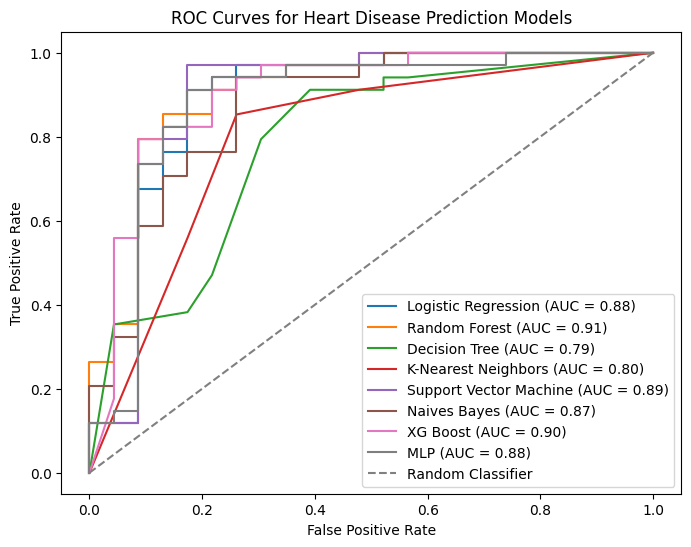

In [ ]:
#Membuat ROC Analisis
def plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_knn, y_pred_svm, y_pred_nb, y_pred_xgb,y_pred_mlp):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
    fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
    fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)

    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
    plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.2f})')
    plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_svm:.2f})')
    plt.plot(fpr_nb, tpr_nb, label=f'Naives Bayes (AUC = {auc_nb:.2f})')
    plt.plot(fpr_xgb, tpr_xgb, label=f'XG Boost (AUC = {auc_xgb:.2f})')
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

    # Plot random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')


    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_knn, y_pred_svm, y_pred_nb, y_pred_xgb, y_pred_mlp)

In [ ]:
def find_rates_for_thresholds(y_test, y_pred, threshold):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

thresholds = np.arange(0, 1.1, 0.1)

fpr_logreg, tpr_logreg = find_rates_for_thresholds(y_test, y_pred_logreg, thresholds)
fpr_rf, tpr_rf = find_rates_for_thresholds(y_test, y_pred_rf, thresholds)
fpr_dt, tpr_dt = find_rates_for_thresholds(y_test, y_pred_dt, thresholds)
fpr_knn, tpr_knn = find_rates_for_thresholds(y_test, y_pred_knn, thresholds)
fpr_svm, tpr_svm = find_rates_for_thresholds(y_test, y_pred_svm, thresholds)
fpr_nb, tpr_nb = find_rates_for_thresholds(y_test, y_pred_nb, thresholds)
fpr_xgb, tpr_xgb = find_rates_for_thresholds(y_test, y_pred_xgb, thresholds)
fpr_mlp, tpr_mlp = find_rates_for_thresholds(y_test, y_pred_mlp, thresholds)

'''TODO: Silahkan buat Summary DataFrame'''
summary_df = pd.DataFrame({
    'Threshold': thresholds,
    'FPR_logreg' : fpr_logreg,
    'FPR_rf' : fpr_rf,
    'FPR_dt' : fpr_dt,
    'FPR_knn' : fpr_knn,
    'FPR_svm' : fpr_svm,
    'FPR_nb' : fpr_nb,
    'FPR_xgb' : fpr_xgb,
    'FPR_mlp' : fpr_mlp,
    'TPR_logreg' : tpr_logreg,
    'TPR_rf' : tpr_rf,
    'TPR_dt' : tpr_dt,
    'TPR_knn' : tpr_knn,
    'TPR_svm' : tpr_svm,
    'TPR_nb' : tpr_nb,
    'TPR_xgb' : tpr_xgb,
    'TPR_mlp' : tpr_mlp})

print(summary_df)

    Threshold  FPR_logreg    FPR_rf    FPR_dt   FPR_knn   FPR_svm    FPR_nb  \
0         0.0    1.000000  1.000000  0.565217  0.478261  1.000000  1.000000   
1         0.1    0.478261  0.782609  0.521739  0.478261  0.478261  0.260870   
2         0.2    0.347826  0.565217  0.521739  0.478261  0.347826  0.260870   
3         0.3    0.217391  0.478261  0.391304  0.478261  0.260870  0.260870   
4         0.4    0.173913  0.304348  0.347826  0.260870  0.173913  0.260870   
5         0.5    0.173913  0.217391  0.347826  0.260870  0.173913  0.173913   
6         0.6    0.130435  0.086957  0.304348  0.260870  0.130435  0.173913   
7         0.7    0.130435  0.086957  0.217391  0.173913  0.086957  0.173913   
8         0.8    0.086957  0.043478  0.217391  0.173913  0.086957  0.130435   
9         0.9    0.086957  0.000000  0.173913  0.173913  0.086957  0.130435   
10        1.0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

     FPR_xgb   FPR_mlp  TPR_logreg    TPR_rf    TPR

In [ ]:
def find_best_threshold(y_test, y_pred):
    # based on Youden's Index
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    optimal_idx = np.argmax(tpr-fpr)
    return thresholds[optimal_idx]

best_threshold_logreg = find_best_threshold(y_test, y_pred_logreg)
best_threshold_rf = find_best_threshold(y_test, y_pred_rf)
best_threshold_dt = find_best_threshold(y_test, y_pred_dt)
best_threshold_knn = find_best_threshold(y_test, y_pred_knn)
best_threshold_svm = find_best_threshold(y_test, y_pred_svm)
best_threshold_nb = find_best_threshold(y_test, y_pred_nb)
best_threshold_xgb = find_best_threshold(y_test, y_pred_xgb)
best_threshold_mlp = find_best_threshold(y_test, y_pred_mlp)

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Decision Tree: {best_threshold_dt}")
print(f"Best threshold for K-Nearest Neighbors: {best_threshold_knn}")
print(f"Best threshold for Support Vector Machine: {best_threshold_svm}")
print(f"Best threshold for Naives Bayes: {best_threshold_nb}")
print(f"Best threshold for XG Boost: {best_threshold_xgb}")
print(f"Best threshold for MLP: {best_threshold_mlp}")

Best threshold for Logistic Regression: 0.3493650804041196
Best threshold for Random Forest: 0.5796342477681866
Best threshold for Decision Tree: 0.36363636363636365
Best threshold for K-Nearest Neighbors: 0.6666666666666666
Best threshold for Support Vector Machine: 0.3923609116353005
Best threshold for Naives Bayes: 0.07389293647117903
Best threshold for XG Boost: 0.6165695786476135
Best threshold for MLP: 0.29633875086758865


**Ingat**

1. Jika kita menginginkan model yang memiliki sensitivitas yang tinggi, yaitu kemampuan untuk mendeteksi sebanyak mungkin kasus positif (True Positive), maka lebih baik menggunakan treshold yang lebih rendah. Namun, ini mungkin juga akan menyebabkan peningkatan False Positive Rate (kasus negatif yang salah diprediksi positif).
2. Sebaliknya, jika kita ingin mengurangi kesalahan dalam memprediksi kasus negatif sebagai positif (False Positive), maka kita akan memilih treshold yang lebih tinggi. Namun, ini dapat mengurangi sensitivitas model (menyebabkan lebih banyak True Negative yang salah diprediksi negatif).

Jadi dapat disimpulkan, bahwa model yang peformanya lebih bagus ialah model Random Forest dengan ditandai dengan model Random Forest yang memiliki nilai akurasi pada classification report tertinggi, yaitu sebesar 84% dan Model Random Forest memiliki score AUC-ROC Terbesar dibandingkan 3 model lainnya, yaitu sebesar 91%, dan model ini memiliki treshold yang tidak terlalu tinggi,dimana tidak akan meningkatkan FPR (Kasus negatif yang salah diprediksi positif) secara significant.

In [ ]:
import pickle
# Menyimpan model terbaik dengan pickle
pklname = "best_model_rf.pkl"

with open(pklname, 'wb') as file:
    pickle.dump(fit_clf_rf, file)